<a href="https://colab.research.google.com/github/kn1ght0108/age-dataset-analysis/blob/alpha/Age_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing important library
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy as sci
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
# Read the CSV file
age_df = pd.read_csv("/content/drive/MyDrive/CSVData/AgeDataset-V1.csv")
age_df = age_df.drop(labels=['Id', 'Birth year'], axis=1)
age_df = age_df.dropna()

In [3]:
# Set style
sns.set_theme(style='ticks', palette='deep', rc={'patch.linewidth':'0.5', 'figure.figsize':(8,5)})

In [76]:
def count_other(series, threshold):
  mask = series.value_counts() > threshold
  new_series = series.value_counts()[mask]
  new_series['Other'] = series.value_counts()[~mask].sum()
  return new_series

def repl_with_other(df, cols, threshold):
  new_df = df
  for col in cols:
    mask = df[col].value_counts() > threshold
    to_other = mask[mask == False].index
    new_df = new_df.replace({col : to_other}, {col:'other'})
  return new_df

def writetotxt(filename, series):
  textfile = open(str(filename),'w')
  for txt in series:
    textfile.write('%s\n' % txt)
  textfile.close()

def resplot(x, y, y_pred):
  residue = y - y_pred
  fig, ax = plt.subplots(1,1)
  plt.scatter(x, residue)
  ax.axes.axhline(linestyle='--', color='black', linewidth=1.25)

In [78]:
new_df = repl_with_other(age_df, ['Occupation', 'Manner of death'], 1000)
new_df[new_df['Occupation'] == 'other']

,Name,Short description,Gender,Country,Occupation,Death year,Manner of death,Age of death
5,Jean-François Champollion,French classical scholar,Male,Kingdom of France; First French Empire,other,1832.0,natural causes,42.0
13,Louis IX of France,king of France,Male,France,other,1270.0,natural causes,56.0
14,Adolf Hitler,"Austrian-born German politician, chancellor an...",Male,Nazi Germany; Austria-Hungary; Weimar Republic...,other,1945.0,suicide,56.0
44,Jean Moulin,French resistance fighter and civil servant,Male,France,other,1943.0,homicide,44.0
45,Cleopatra,last active pharaoh of Ptolemaic Egypt,Female,Ancient Egypt,other,-30.0,suicide,39.0
...,...,...,...,...,...,...,...,...
1212315,Adolf Fuchs,German journalist,Male,Nazi Germany; Weimar Republic; German Empire,other,1942.0,homicide,64.0
1213739,Peter Kuranda,Austrian journalist,Male,Austria; Austria-Hungary,other,1938.0,suicide,42.0
1214231,Manuel Bartual Verdejo,"Spanish mechanic, drafter and revolutionary",Male,Spain,other,1886.0,capital punishment,42.0
1214348,Baha Abu al-Ata,Palestinian terrorist organization leader,Male,State of Palestine,other,2019.0,other,42.0


In [5]:
age_df

,Name,Short description,Gender,Country,Occupation,Death year,Manner of death,Age of death
0,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1799.0,natural causes,67.0
1,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,2001.0,natural causes,49.0
2,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1865.0,homicide,56.0
5,Jean-François Champollion,French classical scholar,Male,Kingdom of France; First French Empire,Egyptologist,1832.0,natural causes,42.0
7,Claude Monet,French impressionist painter (1840-1926),Male,France,Artist,1926.0,natural causes,86.0
...,...,...,...,...,...,...,...,...
1215502,John Saxton,British diarist and settler in New Zealand,Male,United Kingdom of Great Britain and Ireland,Settler,1866.0,suicide,59.0
1217919,Antonín Gruncl,Czechoslovak musician,Male,Czechoslovakia,Artist,1942.0,capital punishment,37.0
1221308,Sara Champion,British archaeologist,Female,United Kingdom,Researcher,2000.0,natural causes,54.0
1222916,Dolores Millanes,baaŋa ŋun nyɛ paɣa,Female,Spain,Artist,1906.0,shipwrecking,47.0


In [6]:
# Data summary
age_df.describe()

,Death year,Age of death
count,45828.000000,45828.000000
mean,1951.331697,59.508205
std,158.544508,18.245002
min,-1145.000000,11.000000
25%,1944.000000,46.000000
50%,1990.000000,61.000000
75%,2008.000000,74.000000
max,2020.000000,122.000000


In [7]:
age_df.corr()

,Death year,Age of death
Death year,1.000000,0.198182
Age of death,0.198182,1.000000


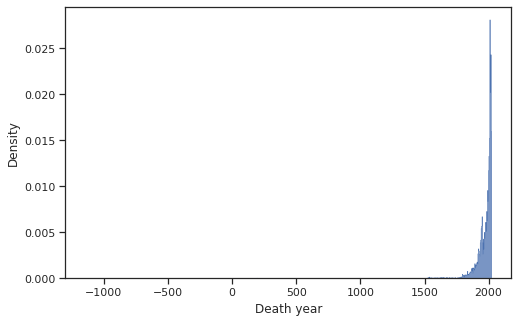

In [8]:
# Death year distribution 
DeathYear = age_df['Death year']
sns.histplot(DeathYear, stat='density', element='step')

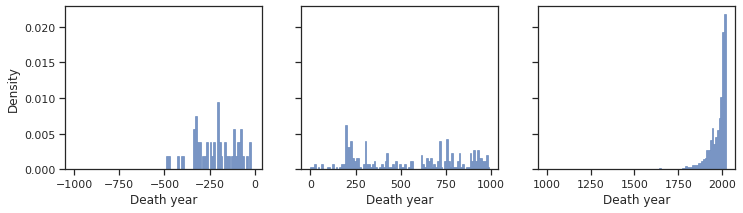

In [9]:
# Death year distribution 
bins_1000bc0ce = np.arange(-1000, 0, 10)
bins_0ce1000ce = np.arange(0, 1000, 10)
bins_1000ce2022ce = np.arange(1000, 2022, 10)
# Make 1x3 subplots
fig, ax = plt.subplots(1, 3, figsize=(12,3), sharey=True)
kde = False
sns.histplot(DeathYear,bins = bins_1000bc0ce, stat='density', kde=kde,ax=ax[0], element='step')
sns.histplot(DeathYear,bins = bins_0ce1000ce, stat='density', kde=kde, ax=ax[1], element='step')
sns.histplot(DeathYear,bins = bins_1000ce2022ce, stat='density', kde=kde, ax=ax[2], element='step')

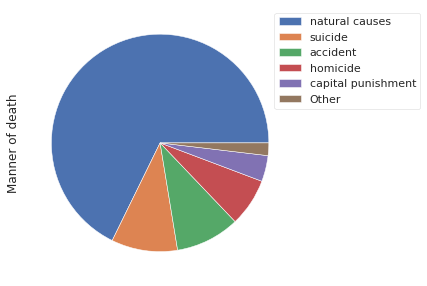

In [10]:
# Manner of death
death = age_df['Manner of death']
count_other(death, 500).plot.pie(labeldistance = None, figsize=(5,5))
plt.legend(loc='best',bbox_to_anchor=(0.9, 1))

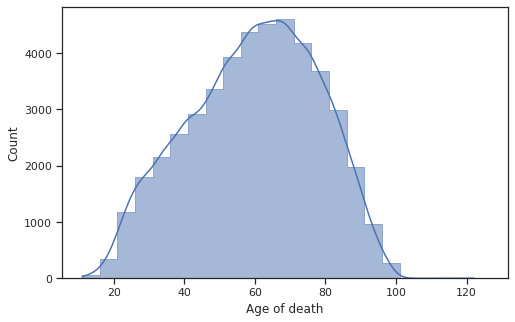

In [11]:
# Age of Death distribution
DeathAge = age_df['Age of death']
bins_deathage = np.arange(DeathAge.min(), DeathAge.max()+5, 5)
sns.histplot(DeathAge,bins = bins_deathage, kde=True, element='step')

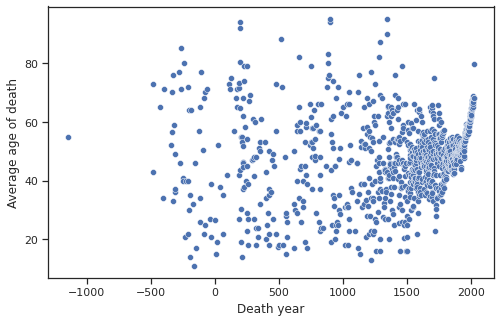

In [12]:
 # Average death age each year from 1900 - 2022
Age_Death = age_df[["Death year","Age of death"]].groupby(["Death year"], as_index=False, sort=True).mean()
Age_Death = Age_Death.rename(columns={'Age of death':'Average age of death'})
x_ad = Age_Death['Death year']
y_ad = Age_Death['Average age of death']
sns.scatterplot(x=x_ad, y=y_ad)


In [13]:
# Making a linear regression model
X_train, X_test, y_train, y_test = train_test_split(np.array(x_ad), np.array(y_ad), test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = X_train.reshape(-1,1), X_test.reshape(-1,1), y_train.reshape(-1,1), y_test.reshape(-1,1)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

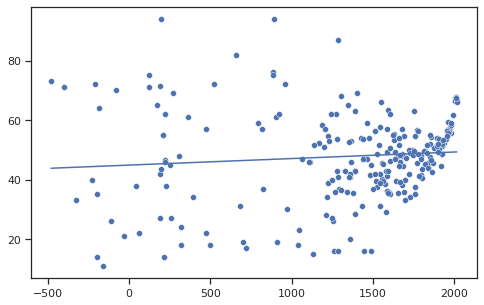

In [14]:
# Linear model test
sns.lineplot(x=np.squeeze(X_test),y=np.squeeze(reg.predict(X_test)))
sns.scatterplot(x=np.squeeze(X_test), y=np.squeeze(y_test))

In [15]:
# Test the linear model
print('R2: ',reg.score(X_test, y_test))
print('Coefficient: ', np.squeeze(reg.coef_))
print('Intercept: ', np.squeeze(reg.intercept_))

R2:  0.008194754376537938
Coefficient:  0.002197684031097558
Intercept:  44.87385718083119


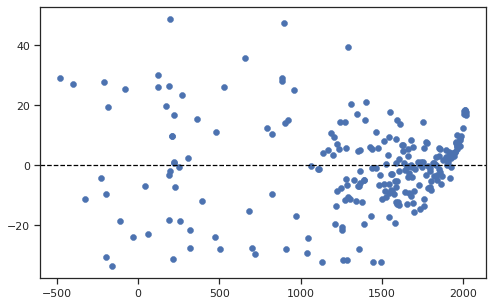

In [16]:
# Residue plot of the linear model
resplot(x=np.squeeze(X_test), y=np.squeeze(y_test), y_pred=np.squeeze(reg.predict(X_test)))

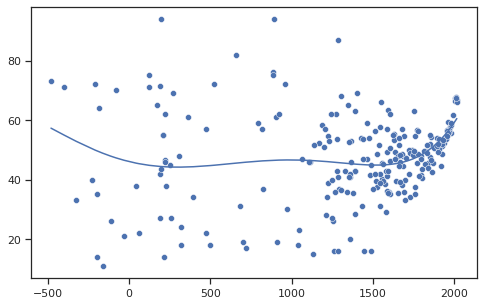

In [17]:
# Making a polynomial regression model
polynomial_model = Pipeline([('stdscale', preprocessing.StandardScaler()), 
                             ('poly', preprocessing.PolynomialFeatures(degree=5)), 
                             ('linear', linear_model.LinearRegression())])
polynomial_model.fit(X_train, y_train)
y_polpred = np.squeeze(polynomial_model.predict(X_test))
sns.lineplot(x=np.squeeze(X_test), y= y_polpred)
sns.scatterplot(x=np.squeeze(X_test), y=np.squeeze(y_test))

In [18]:
# Test the polynomial model
print('R2: ',polynomial_model.score(X_test, y_test))
print('Coefficient: ', np.squeeze(polynomial_model['linear'].coef_))
print('Intercept: ', np.squeeze(polynomial_model['linear'].intercept_))

R2:  0.08160717670946172
Coefficient:  [ 0.         -3.13573871  0.49205139  7.07288228  4.28954447  0.64508839]
Intercept:  45.54965268735473


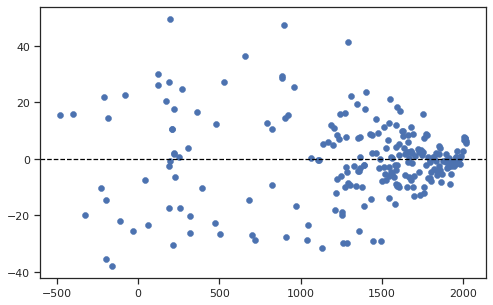

In [19]:
# Residue plot of the polynomial model
resplot(np.squeeze(X_test), np.squeeze(y_test), y_polpred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


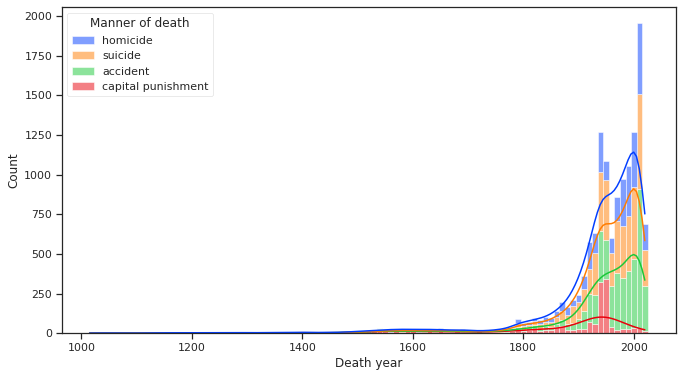

In [67]:
unnaturalDeath = age_df[(age_df['Manner of death'].str.contains('^(suicide|homicide|accident|capital punishment)(?!.)'))&(age_df['Death year'] >= 1000)]
fig, ax = plt.subplots(1, 1, figsize=(11,6))
sns.histplot(data=unnaturalDeath, x='Death year', binwidth=10, kde=True, hue='Manner of death', multiple='stack', palette='bright', ax=ax)

In [79]:
df_with_other = repl_with_other(age_df, ['Occupation', 'Manner of death'], 1000)

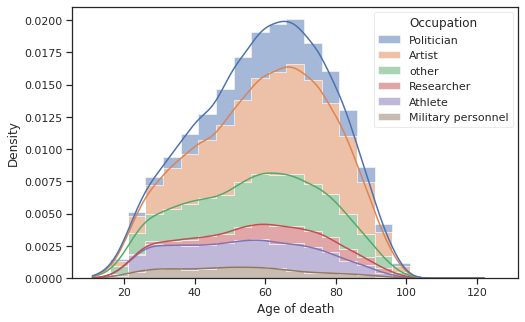

In [88]:
sns.histplot(df_with_other, x='Age of death', binwidth=5, kde=True, stat='density', hue='Occupation', multiple='stack', element='step')

In [107]:
n = df_with_other[['Occupation', 'Manner of death', 'Age of death']].groupby(['Occupation', 'Manner of death'], as_index=False).mean()
n

,Occupation,Manner of death,Age of death
0,Artist,accident,49.281302
1,Artist,capital punishment,45.044199
2,Artist,homicide,45.173835
3,Artist,natural causes,65.738600
4,Artist,other,49.920635
5,Artist,suicide,48.323416
6,Athlete,accident,41.004171
7,Athlete,capital punishment,38.846154
8,Athlete,homicide,38.382609
9,Athlete,natural causes,60.002046


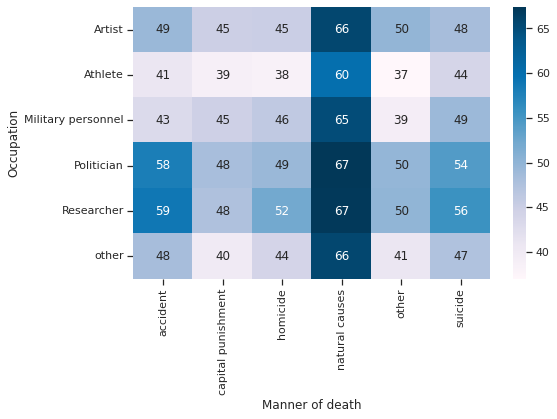

In [112]:
sns.heatmap(n.pivot('Occupation', 'Manner of death', 'Age of death'), annot=True, cmap='PuBu')